In [257]:
#import important libraries
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn import metrics
import random
from sklearn.metrics import roc_auc_score
import collections
import operator

In [258]:
#reading the file 
df=pd.read_csv("Bank_data.csv")


In [259]:
#importing ordinal encoder to encode the categorical value sto numeric numbers
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["age"] = ord_enc.fit_transform(df[["age"]])
df['age']=df['age'].astype(int)

In [260]:
#dropping the unneccassary columns
df=df.drop(['step', 'customer','zipcodeOri','merchant','zipMerchant'], axis=1)

In [261]:
#after summing up time duration for each user specific movie,Outlier technique will be applied on it to get better results
lower_limit=df['amount'].quantile(0.05)
upper_limit=df['amount'].quantile(0.95)

#removing all the outliers from dataset
df=df[(df['amount']>lower_limit) & (df['amount']<upper_limit)]

In [262]:
transactions=df.to_numpy()
transactions=transactions.tolist()
transactions

[[4, "'M'", "'es_transportation'", 4.55, 0],
 [2, "'M'", "'es_transportation'", 39.68, 0],
 [4, "'F'", "'es_transportation'", 26.89, 0],
 [3, "'M'", "'es_transportation'", 17.25, 0],
 [5, "'M'", "'es_transportation'", 35.72, 0],
 [3, "'F'", "'es_transportation'", 25.81, 0],
 [1, "'F'", "'es_transportation'", 9.1, 0],
 [4, "'F'", "'es_transportation'", 21.17, 0],
 [3, "'M'", "'es_transportation'", 32.4, 0],
 [5, "'F'", "'es_transportation'", 35.4, 0],
 [4, "'F'", "'es_transportation'", 14.95, 0],
 [3, "'M'", "'es_health'", 68.79, 0],
 [5, "'M'", "'es_transportation'", 20.32, 0],
 [3, "'M'", "'es_transportation'", 13.56, 0],
 [3, "'F'", "'es_transportation'", 30.19, 0],
 [4, "'M'", "'es_transportation'", 17.54, 0],
 [5, "'F'", "'es_transportation'", 40.69, 0],
 [2, "'M'", "'es_transportation'", 21.21, 0],
 [2, "'F'", "'es_transportation'", 10.09, 0],
 [2, "'F'", "'es_transportation'", 19.31, 0],
 [2, "'M'", "'es_transportation'", 44.22, 0],
 [5, "'F'", "'es_transportation'", 44.39, 0],
 

In [263]:
#Storing each list into specific dict key according to type
num_transactions=len(transactions)
conditions={
    "'es_transportation'":[],
    "'es_transportation'" :[],
    "'es_food'"          :[],
    "'es_health'" :[],
    "'es_wellnessandbeauty'":[],
    "'es_fashion'"             :[],
    "'es_barsandrestaurants'"     :[],
    "'es_hyper'"                 :[],
    "'es_sportsandtoys'"          :[],
    "'es_tech'"                  :[],
    "'es_home'"                   :[],
    "'es_hotelservices'"          :[],
    "'es_otherservices'"            :[],
    "'es_contents'"                :[],
    "'es_travel'"                  :[],
    "'es_leisure'"                 :[]
}
#Going through each datapoint and only those values will be appended that has Fraud==1
for i in range(0,len(transactions)):
    if transactions[i][4]==1:
        if transactions[i][2]=="'es_transportation'":
            conditions["'es_transportation'"].append(transactions[i])
            
        if transactions[i][2]=="'es_food'":
            conditions["'es_food'"].append(transactions[i])
            
        if transactions[i][2]=="'es_health'":
            conditions["'es_health'"].append(transactions[i])
            
        if transactions[i][2]=="'es_wellnessandbeauty'":
            conditions["'es_wellnessandbeauty'"].append(transactions[i])
            
        if transactions[i][2]=="'es_fashion'":
            conditions["'es_fashion'"].append(transactions[i])
            
        if transactions[i][2]=="'es_barsandrestaurants'":
            conditions["'es_barsandrestaurants'"].append(transactions[i])
            
        if transactions[i][2]=="'es_hyper'":
            conditions["'es_hyper'"].append(transactions[i])
      
        if transactions[i][2]=="'es_sportsandtoys'":
            conditions["'es_sportsandtoys'"].append(transactions[i])
            
        if transactions[i][2]=="'es_tech'":
            conditions["'es_tech'"].append(transactions[i])
            
        if transactions[i][2]=="'es_home'":
            conditions["'es_home'"].append(transactions[i])
            
        if transactions[i][2]=="'es_hotelservices'":
            conditions["'es_hotelservices'"].append(transactions[i])
            
        if transactions[i][2]=="'es_otherservices'":
            conditions["'es_otherservices'"].append(transactions[i])
            
        if transactions[i][2]=="'es_leisure'":
            conditions["'es_leisure'"].append(transactions[i])
            
        if transactions[i][2]=="'es_leisure'":
            conditions["'es_leisure'"].append(transactions[i])
            
        if transactions[i][2]=="'es_travel'":
            conditions["'es_travel'"].append(transactions[i])

In [264]:
conditions

{"'es_transportation'": [],
 "'es_food'": [],
 "'es_health'": [[3, "'M'", "'es_health'", 44.26, 1],
  [5, "'F'", "'es_health'", 41.98, 1],
  [4, "'M'", "'es_health'", 17.1, 1],
  [2, "'M'", "'es_health'", 34.32, 1],
  [3, "'F'", "'es_health'", 8.25, 1],
  [3, "'F'", "'es_health'", 52.14, 1],
  [4, "'F'", "'es_health'", 36.47, 1],
  [4, "'F'", "'es_health'", 72.69, 1],
  [4, "'M'", "'es_health'", 29.68, 1],
  [4, "'M'", "'es_health'", 53.01, 1],
  [5, "'F'", "'es_health'", 31.05, 1],
  [2, "'M'", "'es_health'", 57.67, 1],
  [4, "'F'", "'es_health'", 17.57, 1],
  [5, "'F'", "'es_health'", 25.65, 1],
  [3, "'F'", "'es_health'", 69.72, 1],
  [2, "'M'", "'es_health'", 7.87, 1],
  [2, "'F'", "'es_health'", 7.59, 1],
  [4, "'M'", "'es_health'", 29.01, 1],
  [3, "'F'", "'es_health'", 50.83, 1],
  [1, "'F'", "'es_health'", 36.12, 1],
  [2, "'F'", "'es_health'", 33.24, 1],
  [5, "'F'", "'es_health'", 29.84, 1],
  [3, "'M'", "'es_health'", 78.49, 1],
  [5, "'F'", "'es_health'", 26.26, 1],
  [4, "

In [265]:
def get_list(y):
    amount_list=[]
    age_list=[]
    for i in range(0,len(y)):
        amount_list.append(y[i][3])
        age_list.append(y[i][0])
    return amount_list,age_list

In [266]:
def highly_occured_value(y):
    age_list=[]
    for i in range(0,len(y)):
        age_list.append(y[i][0])
    # initializing the list
    # using Counter to find frequency of elements
    frequency = collections.Counter(age_list)
    frequency=dict(frequency)
    max_key = max(frequency.items(), key=operator.itemgetter(1))[0]
    return max_key

In [267]:

def get_frequent_items(transactions):
    limit={}
    
    Gender={
        'F':[],
        'M':[],
        'E':[],
        'U':[]
    }
    #seperating the list based on its gender value
    for i in range(0,len(transactions)):
        if transactions[i][1]=="'F'":
            Gender['F'].append(transactions[i])
        elif transactions[i][1]=="'M'":
            Gender['M'].append(transactions[i])
        elif transactions[i][1]=="'E'":
            Gender['E'].append(transactions[i])
        elif transactions[i][1]=="'U'":
            Gender['U'].append(transactions[i])
            
    threshold=0.98
    for x,y in Gender.items():
        freq=-0.000000000009
        value=0
        dic={}
        temp={}
        if len(y)>0:
            amount_list,age_list=get_list(y)
            while freq<=threshold:
                random_choice=random.choice(amount_list)
                count=0
                for i in range(0,len(amount_list)):
                    if amount_list[i]<=random_choice:
                        count+=1
                freq=count/len(amount_list)
                value=random_choice

            dic['amount_limit']=value
            dic['age_limit']=highly_occured_value(y)
            dic['min_limit']=min(amount_list)
        else:
            dic['amount_limit']=0
            dic['age_limit']=0
            dic['min_limit']=0
            temp[x]=dic
            limit.update(temp)
            
        temp[x]=dic
        limit.update(temp)
        
    return limit

In [268]:
limit={}
#this function will iterate through each category  values of dictionary to get the max limit
for x,y in conditions.items():
    amount_list=[]
    age_list=[]
    if len(y)>0:
        temp={}
        temp[x]=get_frequent_items(y)
        limit.update(temp)

In [269]:
limit

{"'es_health'": {'F': {'amount_limit': 78.96,
   'age_limit': 2,
   'min_limit': 3.93},
  'M': {'amount_limit': 78.49, 'age_limit': 2, 'min_limit': 3.63},
  'E': {'amount_limit': 0, 'age_limit': 0, 'min_limit': 0},
  'U': {'amount_limit': 0, 'age_limit': 0, 'min_limit': 0}},
 "'es_wellnessandbeauty'": {'F': {'amount_limit': 79.22,
   'age_limit': 2,
   'min_limit': 3.27},
  'M': {'amount_limit': 76.94, 'age_limit': 4, 'min_limit': 4.95},
  'E': {'amount_limit': 0, 'age_limit': 0, 'min_limit': 0},
  'U': {'amount_limit': 0, 'age_limit': 0, 'min_limit': 0}},
 "'es_fashion'": {'F': {'amount_limit': 62.28,
   'age_limit': 2,
   'min_limit': 4.35},
  'M': {'amount_limit': 69.81, 'age_limit': 4, 'min_limit': 12.1},
  'E': {'amount_limit': 0, 'age_limit': 0, 'min_limit': 0},
  'U': {'amount_limit': 0, 'age_limit': 0, 'min_limit': 0}},
 "'es_barsandrestaurants'": {'F': {'amount_limit': 78.19,
   'age_limit': 2,
   'min_limit': 5.11},
  'M': {'amount_limit': 64.05, 'age_limit': 2, 'min_limit': 

In [270]:
#This function will write the rules that are passed by get_rules function
def write_rules(rules):
    final_rules=""
    if len(rules[1])>1:
        final_rules+="{ "+rules[1][0]
        final_rules+=" ,type=="+str(rules[0])
        final_rules+=" ,"+rules[1][1]
        final_rules+=" ,"+rules[1][2]
        final_rules+= " Support : {0:2.7f}".format(rules[2])
        final_rules+=" confidence : {0:2.7f}  ".format(rules[3])
        final_rules+=" } -> {FRAUD}"
    else:   
        final_rules=" "
        final_rules+="{ "+rules[1][0]
        final_rules+=" , type=="+str(rules[0])
        final_rules+= " Support : {0:2.7f}".format(rules[2])
        final_rules+=" confidence : {0:2.7f}  ".format(rules[3])
        final_rules+=" } -> {FRAUD}"
    
    return final_rules

#this function will check if rules count >= threshold it will append to rules and pass it to write_rules function to write rules
def check_threshold(length,rules,count,name,type_name,min_support,min_confidence):
    confidence=count/length
    support=count/num_transactions
    if confidence>=min_confidence and support>= min_support:
        rules.append(write_rules([type_name,name,support,confidence]))
        return rules
    return rules

#after getting the values stored as key-value pair, we will iterate through each datapouint and will apply conditions on it to get patterns

def get_rules(conditions,min_support,min_confidence,limit):
    #Dict to store count of each condition that is satisfied 

    case=conditions[0][2] #getting transaction type name
    # these variables will be used as dict key to store count of each condition that appears to be true for specific transaction
    amount_greater="amount>="
    amount_less="amount<"
    age_greater="age>="
    age_less="age<"
    #dict named type will store the count of each transaction that satisfies the following 
    Type= { 'F':{ amount_greater : 
                 {
                     age_greater:0,
                      age_less:0
                 },
            amount_less : {
                age_greater:0,
                age_less:0
            }
                },
           'M':{ amount_greater : {age_greater:0,
                                   age_less:0},
            amount_less :{
                age_greater:0,
                age_less:0}
               },
           'E':{
               amount_greater : 
               {
                   age_greater:0,
                   age_less:0},
            amount_less :
               {
                   age_greater:0,
                   age_less:0}},
           'U':{ amount_greater : {
               age_greater:0,
               age_less:0},
            amount_less :{
                age_greater:0,
                age_less:0}
               }
                }    
    #This will iterate through values of each key,
    for i in range(0,len(conditions)):
        amount=conditions[i][3]
        gender=conditions[i][1]
        age=conditions[i][0]
        category=conditions[i][2]
        
        if gender=="'F'":
            amount_limit=limit[category]['F']['amount_limit']
            age_limit=limit[category]['F']['age_limit']
            min_limit=limit[category]['F']['min_limit']
            
            
        elif gender=="'M'":
            amount_limit=limit[category]['M']['amount_limit']
            age_limit=limit[category]['M']['age_limit']
            min_limit=limit[category]['M']['min_limit']
            
        elif gender=="'E'":
            amount_limit=limit[category]['E']['amount_limit']
            age_limit=limit[category]['E']['age_limit']
            min_limit=limit[category]['E']['min_limit']
            
        elif gender=="'U'":
            amount_limit=limit[category]['U']['amount_limit']
            age_limit=limit[category]['U']['age_limit']
            min_limit=limit[category]['U']['min_limit']
            
        #applying rules _ for each datapoint that satisfies the condition, it will increment count by 1
        if amount>=amount_limit and age>=age_limit and gender=="'F'" and amount>=min_limit:
            Type['F'][amount_greater][age_greater]+=1
            
        elif amount>=amount_limit and age<age_limit and gender=="'F'" and amount>=min_limit:
            Type['F'][amount_greater][age_less]+=1
            
        elif amount<amount_limit and age>=age_limit and gender=="'F'" and amount>=min_limit:
            Type['F'][amount_less][age_greater]+=1
        
        elif amount>=amount_limit and age<age_limit and gender=="'F'" and amount>=min_limit:
            Type['F'][amount_greater][age_less]+=1
        
        elif amount>=amount_limit and age>=age_limit and gender=="'M'" and amount>=min_limit:
            Type['M'][amount_greater][age_greater]+=1
            
        elif amount>=amount_limit and age<age_limit and gender=="'M'" and amount>=min_limit:
            Type['M'][amount_greater][age_less]+=1
            
        elif amount<amount_limit and age>=age_limit and gender=="'M'" and amount>=min_limit:
            Type['M'][amount_less][age_greater]+=1
        
        elif amount>=amount_limit and age<age_limit and gender=="'M'" and amount>=min_limit:
            Type['M'][amount_greater][age_less]+=1
            
        elif amount>=amount_limit and age>=age_limit and gender=="'E'" and amount>=min_limit:
            Type['E'][amount_greater][age_greater]+=1
            
        elif amount>=amount_limit and age<age_limit and gender=="'E'" and amount>=min_limit:
            Type['E'][amount_greater][age_less]+=1
            
        elif amount<amount_limit and age>=age_limit and gender=="'E'" and amount>=min_limit:
            Type['E'][amount_less][age_greater]+=1
        
        elif amount>=amount_limit and age<age_limit and gender=="'E'" and amount>=min_limit:
            Type['E'][amount_greater][age_less]+=1
            
        
        elif amount>=amount_limit and age>=age_limit and gender=="'U'" and amount>=min_limit:
            Type['U'][amount_greater][age_greater]+=1
            
        elif amount>=amount_limit and age<age_limit and gender=="'U'" and amount>=min_limit:
            Type['U'][amount_greater][age_less]+=1
            
        elif amount<amount_limit and age>=age_limit and gender=="'U'" and amount>=min_limit:
            Type['U'][amount_less][age_greater]+=1
        
        elif amount>=amount_limit and age<age_limit and gender=="'U'" and amount>=min_limit:
            Type['U'][amount_greater][age_less]+=1
            
    #after loops complete transaction items, we will check threshold and append rules to list named rules
    length=len(conditions)           
    #this list will contain data of those transaction that satisfies the condition
    rules=[]
    #checking which condition satisfies the threshold condition

    Amount_Greater="amount>="+str(limit[case]['F']['amount_limit'])+" & "+str(limit[case]['F']['min_limit'])+"<=amount"
    Age_Greater="age>="+str(limit[case]['F']['age_limit'])
    name=['gender==F',Amount_Greater,Age_Greater]
    rule=check_threshold(length,rules,Type['F'][amount_greater][age_greater],name,case,min_support,min_confidence)
    rules=rule
    
    Amount_Greater="amount>="+str(limit[case]['F']['amount_limit'])+" & "+str(limit[case]['F']['min_limit'])+"<=amount"
    Age_Less="age<"+str(limit[case]['F']['age_limit'])
    name=['gender==F',Amount_Greater,Age_Less]
    rule=check_threshold(length,rules,Type['F'][amount_greater][age_less],name,case,min_support,min_confidence)
    rules=rule
                
    Amount_Less="amount<"+str(limit[case]['F']['amount_limit'])+" & "+str(limit[case]['F']['min_limit'])+"<=amount"
    Age_Greater="age>="+str(limit[case]['F']['age_limit'])
    name=['gender==F',Amount_Less,Age_Greater]
    rule=check_threshold(length,rules,Type['F'][amount_less][age_greater],name,case,min_support,min_confidence)
    rules=rule
            
    
    Amount_Less="amount<"+str(limit[case]['F']['amount_limit'])+" & "+str(limit[case]['F']['min_limit'])+"<=amount"
    Age_Less="age<"+str(limit[case]['F']['age_limit'])
    name=['gender==F',Amount_Less,Age_Less]
    rule=check_threshold(length,rules,Type['F'][amount_less][age_less],name,case,min_support,min_confidence)
    rules=rule
    
    
    Amount_Greater="amount>="+str(limit[case]['E']['amount_limit'])+" & "+str(limit[case]['E']['min_limit'])+"<=amount"
    Age_Greater="age>="+str(limit[case]['E']['age_limit'])
    name=['gender==E',Amount_Greater,Age_Greater]
    rule=check_threshold(length,rules,Type['E'][amount_greater][age_greater],name,case,min_support,min_confidence)
    rules=rule
            
    Amount_Greater="amount>="+str(limit[case]['E']['amount_limit'])+" & "+str(limit[case]['E']['min_limit'])+"<=amount"
    Age_Less="age<"+str(limit[case]['E']['age_limit'])
    name=['gender==E',Amount_Greater,Age_Less]
    rule=check_threshold(length,rules,Type['E'][amount_greater][age_less],name,case,min_support,min_confidence)
    rules=rule
            
    
    Amount_Less="amount<"+str(limit[case]['E']['amount_limit'])+" & "+str(limit[case]['E']['min_limit'])+"<=amount"
    Age_Greater="age>="+str(limit[case]['E']['age_limit'])
    name=['gender==E',Amount_Less,Age_Greater]                                                           
    rule=check_threshold(length,rules,Type['E'][amount_less][age_greater],name,case,min_support,min_confidence)
    rules=rule
                                                                           
                                                                           
    Amount_Less="amount<"+str(limit[case]['E']['amount_limit'])+" & "+str(limit[case]['E']['min_limit'])+"<=amount"
    Age_Less="age<"+str(limit[case]['E']['age_limit'])
    name=['gender==E',Amount_Less,Age_Less]
    rule=check_threshold(length,rules,Type['E'][amount_less][age_less],name,case,min_support,min_confidence)
    rules=rule
    
                                                                           
    Amount_Greater="amount>="+str(limit[case]['M']['amount_limit'])+" & "+str(limit[case]['M']['min_limit'])+"<=amount"
    Age_Greater="age>="+str(limit[case]['M']['age_limit'])
    name=['gender==M',Amount_Greater,Age_Greater]                                                                     
    rule=check_threshold(length,rules,Type['M'][amount_greater][age_greater],name,case,min_support,min_confidence)
    rules=rule
                                                                        
    Amount_Greater="amount>="+str(limit[case]['M']['amount_limit'])+" & "+str(limit[case]['M']['min_limit'])+"<=amount"
    Age_Less="age<"+str(limit[case]['M']['age_limit'])
    name=['gender==M',Amount_Greater,Age_Less]                                                           
    rule=check_threshold(length,rules,Type['M'][amount_greater][age_less],name,case,min_support,min_confidence)
    rules=rule
     
    Amount_Less="amount<"+str(limit[case]['M']['amount_limit'])+" & "+str(limit[case]['M']['min_limit'])+"<=amount"
    Age_Greater="age>="+str(limit[case]['M']['age_limit'])
    name=['gender==M',Amount_Less,Age_Greater] 
    rule=check_threshold(length,rules,Type['M'][amount_less][age_greater],name,case,min_support,min_confidence)
    rules=rule
    
    Amount_Less="amount<"+str(limit[case]['M']['amount_limit'])+" & "+str(limit[case]['M']['min_limit'])+"<=amount"
    Age_Less="age<"+str(limit[case]['M']['age_limit'])
    name=['gender==M',Amount_Less,Age_Less]      
    rule=check_threshold(length,rules,Type['M'][amount_less][age_less],name,case,min_support,min_confidence)
    rules=rule
    
    
    Amount_Greater="amount>="+str(limit[case]['U']['amount_limit'])+" & "+str(limit[case]['U']['min_limit'])+"<=amount"
    Age_Greater="age>="+str(limit[case]['U']['age_limit'])
    name=['gender==U',Amount_Greater,Age_Greater]  
    rule=check_threshold(length,rules,Type['U'][amount_greater][age_greater],name,case,min_support,min_confidence)
    rules=rule
         
    Amount_Greater="amount>="+str(limit[case]['U']['amount_limit'])+" & "+str(limit[case]['U']['min_limit'])+"<=amount"
    Age_Less="age<"+str(limit[case]['U']['age_limit'])
    name=['gender==U',Amount_Greater,Age_Less]                                                                 
    rule=check_threshold(length,rules,Type['U'][amount_greater][age_less],name,case,min_support,min_confidence)
    rules=rule
     
    Amount_Less="amount<"+str(limit[case]['U']['amount_limit'])+" & "+str(limit[case]['U']['min_limit'])+"<=amount"
    Age_Greater="age>="+str(limit[case]['U']['age_limit'])
    name=['gender==U',Amount_Less,Age_Greater] 
    rule=check_threshold(length,rules,Type['U'][amount_less][age_greater],name,case,min_support,min_confidence)
    rules=rule
         
    Amount_Less="amount<"+str(limit[case]['E']['amount_limit'])+" & "+str(limit[case]['E']['min_limit'])+"<=amount"
    Age_Less="age<"+str(limit[case]['E']['age_limit'])
    name=['gender==E',Amount_Less,Age_Less]   
    rule=check_threshold(length,rules,Type['U'][amount_less][age_less],name,case,min_support,min_confidence)
    rules=rule

    return rules


#this function will go through each dict items (conditions) and will pass it to get_rules to apply conditions
def associate_rules(conditions,min_support,min_confidence):
    results=[]
    #Now iterating through each type which has support > than min_support
    for x, y in conditions.items():
        if len(y)>0:
            #getting age and amount limit
            output=get_rules(y,min_support,min_confidence,limit)
            if len(output)>0:
                results.append(output)
    return results

In [271]:
#cally associate_rules to get rules 
associate_rules(conditions,0.00001,0.001)

[["{ gender==F ,type=='es_health' ,amount<78.96 & 3.93<=amount ,age>=2 Support : 0.0002168 confidence : 0.5321101   } -> {FRAUD}",
  "{ gender==M ,type=='es_health' ,amount<78.49 & 3.63<=amount ,age>=2 Support : 0.0001215 confidence : 0.2981651   } -> {FRAUD}"],
 ["{ gender==F ,type=='es_wellnessandbeauty' ,amount<79.22 & 3.27<=amount ,age>=2 Support : 0.0001794 confidence : 0.6037736   } -> {FRAUD}",
  "{ gender==M ,type=='es_wellnessandbeauty' ,amount<76.94 & 4.95<=amount ,age>=4 Support : 0.0000467 confidence : 0.1572327   } -> {FRAUD}"],
 ["{ gender==F ,type=='es_fashion' ,amount<62.28 & 4.35<=amount ,age>=2 Support : 0.0000262 confidence : 0.6363636   } -> {FRAUD}"],
 ["{ gender==F ,type=='es_barsandrestaurants' ,amount<78.19 & 5.11<=amount ,age>=2 Support : 0.0000355 confidence : 0.5277778   } -> {FRAUD}",
  "{ gender==M ,type=='es_barsandrestaurants' ,amount<64.05 & 6.63<=amount ,age>=2 Support : 0.0000206 confidence : 0.3055556   } -> {FRAUD}"],
 ["{ gender==F ,type=='es_hyper'

In [272]:
#Making predictions, Comparing the actual value of Isfraud with predicted value and measuring its performance
#[es_health : 4.0,es_wellnessandbeauty: 14.0,es_fashion :2.0,es_barsandrestaurants:0.0
 #,es_hyper : 7.0,es_sportsandtoys : 10.0,es_tech :11.0:home:5.0,es_hotelservices : 6.0,
 #es_otherservices : 9.0,es_travel :13.0,es_leisure: 8.0]     
 
def predict(x_test):
    #now we will apply the rules generated above to test the model with x_test data
    #converting 
    X_test=x_test.to_numpy()
    X_test=X_test.tolist()
    Y_test=y_test.tolist()
    predictions=[]
    for i in range(0,len(X_test)):
        amount=X_test[i][3]
        gender=X_test[i][1]
        age=X_test[i][0]
        category=X_test[i][2]
        
        
        if gender==0.0 and category==4.0 and amount<limit["'es_health'"]['F']['amount_limit'] and age>=limit["'es_health'"]['F']['age_limit'] and amount>=limit["'es_health'"]['F']['min_limit']:
            predictions.append(1)
            
            
        elif gender==1.0 and category==4.0 and amount<limit["'es_health'"]['M']['amount_limit'] and age>=limit["'es_health'"]['M']['age_limit'] and amount>=limit["'es_health'"]['M']['min_limit']:
            predictions.append(1)
            
            
        elif gender==0.0 and category==2.0 and amount<limit["'es_fashion'"]['F']['amount_limit'] and age>=limit["'es_fashion'"]['F']['age_limit'] and amount<=limit["'es_fashion'"]['F']['min_limit']:
            predictions.append(1)
            
            
        elif gender==0.0 and category==14.0 and amount<limit["'es_wellnessandbeauty'"]['F']['amount_limit'] and age>=limit["'es_wellnessandbeauty'"]['F']['age_limit'] and amount>=limit["'es_wellnessandbeauty'"]['F']['min_limit']:
            predictions.append(1)
    
            
        elif gender==1.0 and category==14.0 and amount<limit["'es_wellnessandbeauty'"]['M']['amount_limit'] and age>=limit["'es_wellnessandbeauty'"]['M']['age_limit'] and amount>=limit["'es_wellnessandbeauty'"]['M']['min_limit']:
            predictions.append(1)
            
        elif gender==0.0 and category==10.0 and amount<limit["'es_sportsandtoys'"]['F']['amount_limit'] and age<limit["'es_sportsandtoys'"]['F']['age_limit']  and amount>=limit["'es_sportsandtoys'"]['F']['min_limit']:
            predictions.append(1)
            
        elif gender==1.0 and category==10.0 and amount<limit["'es_sportsandtoys'"]['M']['amount_limit'] and age>=limit["'es_sportsandtoys'"]['M']['age_limit']  and amount>=limit["'es_sportsandtoys'"]['M']['min_limit']:
            predictions.append(1)

        elif gender==0.0 and category==5.0 and amount<limit["'es_home'"]['F']['amount_limit'] and age>=limit["'es_home'"]['F']['age_limit'] and amount>=limit["'es_home'"]['F']['min_limit']:
            predictions.append(1)
            
        #elif gender==1.0 and category==5.0 and amount<limit["'es_home'"]['M']['amount_limit'] and age>=limit["'es_home'"]['M']['age_limit'] and amount>=limit["'es_home'"]['M']['min_limit']:
          #  predictions.append(1)

        elif gender==0.0 and category==6.0 and amount<limit["'es_hotelservices'"]['F']['amount_limit'] and age>=limit["'es_hotelservices'"]['F']['age_limit']  and amount>=limit["'es_hotelservices'"]['F']['min_limit']:
            predictions.append(1)
        
        elif gender==0.0 and category==9.0 and amount<limit["'es_otherservices'"]['F']['amount_limit'] and age>=limit["'es_otherservices'"]['F']['age_limit']  and amount>=limit["'es_otherservices'"]['F']['min_limit']:
            predictions.append(1)
            
        elif gender==1.0 and category==6.0 and amount<limit["'es_hotelservices'"]['M']['amount_limit'] and age>=limit["'es_hotelservices'"]['M']['age_limit']  and amount>=limit["'es_hotelservices'"]['M']['min_limit']:
            predictions.append(1)
        elif gender==1.0 and category==6.0 and amount<limit["'es_otherservices'"]['M']['amount_limit'] and age>=limit["'es_otherservices'"]['M']['age_limit']  and amount>=limit["'es_otherservices'"]['M']['min_limit']:
            predictions.append(1)
            
        elif gender==0.0 and category==0.0 and amount<limit["'es_barsandrestaurants'"]['F']['amount_limit'] and age>=limit["'es_barsandrestaurants'"]['F']['age_limit'] and amount<=limit["'es_barsandrestaurants'"]['F']['min_limit']:
            predictions.append(1)
        
        elif gender==1.0 and category==0.0 and amount<limit["'es_barsandrestaurants'"]['F']['amount_limit'] and age>=limit["'es_barsandrestaurants'"]['F']['age_limit'] and amount<=limit["'es_barsandrestaurants'"]['F']['min_limit']:
            predictions.append(1) 
            
        elif gender==0.0 and category==11.0 and amount<limit["'es_tech'"]['F']['amount_limit'] and age>=limit["'es_tech'"]['F']['age_limit'] and amount>=limit["'es_tech'"]['F']['min_limit']:
            predictions.append(1)
            
        #elif gender==1.0 and category==11.0 and amount<limit["'es_tech'"]['M']['amount_limit'] and age>=limit["'es_tech'"]['M']['age_limit'] and amount>=limit["'es_tech'"]['M']['min_limit']:
         #   predictions.append(1) 
            
        #elif gender==0.0 and category==13.0 and amount<limit["'es_travel'"]['F']['amount_limit'] and age>=limit["'es_travel'"]['F']['age_limit']  and amount>=limit["'es_travel'"]['F']['min_limit']:
         #   predictions.append(1)

        #elif gender==1.0 and category==13.0 and amount<limit["'es_travel'"]['M']['amount_limit'] and age>=limit["'es_travel'"]['M']['age_limit']  and amount>=limit["'es_travel'"]['M']['min_limit']:
         #   predictions.append(1)  
            
        #elif gender==0.0 and category==8.0 and amount<limit["'es_leisure'"]['F']['amount_limit'] and age>=limit["'es_leisure'"]['F']['age_limit']  and amount>=limit["'es_leisure'"]['F']['min_limit']:
         #   predictions.append(1)

        #elif gender==1.0 and category==8.0 and amount<limit["'es_leisure'"]['M']['amount_limit'] and age>=limit["'es_leisure'"]['M']['age_limit']  and amount>=limit["'es_leisure'"]['M']['min_limit']:
         #   predictions.append(1)
            
            
        elif gender==0.0 and category==7.0 and amount<limit["'es_hyper'"]['F']['amount_limit'] and age>=limit["'es_hyper'"]['F']['age_limit'] and amount<=limit["'es_hyper'"]['F']['min_limit']:
            predictions.append(1)
            
        elif gender==1.0 and category==7.0 and amount<limit["'es_hyper'"]['M']['amount_limit'] and age>=limit["'es_hyper'"]['M']['age_limit'] and amount<=limit["'es_hyper'"]['M']['min_limit']:
            predictions.append(1)
                   
        else:
            predictions.append(0)               
    TP=0
    TN=0
    FP=0
    FN=0
    for j in range(0,len(Y_test)):
        if Y_test[j]==1 and predictions[j]==1:
            TP+=1
        elif Y_test[j]==0 and predictions[j]==1:
            FP+=1
        elif Y_test[j]==1 and predictions[j]==0:
            FN+=1
        elif Y_test[j]==0 and predictions[j]==0:
            TN+=1
    total=TP+FP+FN+TN
    accuracy=(TP+TN)/total
    precision= TP/(TP+FP)
    recall = TP/(TP+FN) 
    return predictions

In [273]:
df["gender"].replace({"'F'": 0, "'M'": 1,"'E'":2,"'U'":3}, inplace=True)


In [274]:
df['category'].value_counts()


'es_transportation'        475777
'es_food'                   23460
'es_wellnessandbeauty'      10189
'es_health'                  6526
'es_barsandrestaurants'      5296
'es_hyper'                   5079
'es_fashion'                 4152
'es_sportsandtoys'           1241
'es_tech'                    1019
'es_contents'                 710
'es_home'                     701
'es_hotelservices'            495
'es_otherservices'            410
'es_travel'                    23
'es_leisure'                   17
Name: category, dtype: int64

In [275]:
#encoding category values 

df["category"] = ord_enc.fit_transform(df[["category"]])
df['category'].value_counts()


12.0    475777
3.0      23460
14.0     10189
4.0       6526
0.0       5296
7.0       5079
2.0       4152
10.0      1241
11.0      1019
1.0        710
5.0        701
6.0        495
9.0        410
13.0        23
8.0         17
Name: category, dtype: int64

In [276]:
# creating two dfs for storing predictors and outcomes
X = df.drop(['fraud'], axis=1)
Y = df['fraud']

#spliting dataset 
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(X,Y,test_size =0.30, random_state=42)


#appling Undersampling method
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
x_train, y_train = rus.fit_resample(x_train, y_train)


In [277]:
#list to store values for each model
Accuracy=[] 
models=[]
FPR=[]
TPR=[]
cf_matrix=[]
Predictions=[]
auc_score=[]

def get_confusion_matrix():
    for i in range(0,len(cf_matrix)):
        ax = sn.heatmap(cf_matrix[i]/np.sum(cf_matrix[i]), annot=True, 
                fmt='.2%', cmap='Blues')
        ax.set_title(models[i]+'  Confusion Matrix\n\n');
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values ');

        ## Ticket labels - List must be in alphabetical order
        ax.xaxis.set_ticklabels(['False','True'])
        ax.yaxis.set_ticklabels(['False','True'])

        ## Display the visualization of the Confusion Matrix.
        plt.show()
def get_classication_report():
    for i in range(0,len(models)):
        print("    ")
        print(models[i]+"  Classification Report           ")
        print(" ")
        print(classification_report(y_test, Predictions[i], labels=[0,1]))
        
#this function will add scores of each model to list to be used for graphs
from sklearn.metrics import roc_auc_score

def measure_performance(prediction,model_name):
    CM=confusion_matrix(y_test, prediction)
    cf_matrix.append(CM)
    accuracy=round(accuracy_score(y_test,prediction),3)
    Accuracy.append(accuracy)                
    models.append(model_name)
    Predictions.append(prediction)
    
    auc = metrics.roc_auc_score(y_test,prediction)
    auc_score.append(round(auc,3))
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, prediction)
    FPR.append(false_positive_rate)
    TPR.append(true_positive_rate)
def get_ROC_curve():
    fig = plt.figure(figsize=(8,6))

    for i in range(len(FPR)):
        plt.plot(FPR[i], 
                 TPR[i], 
                 label="{}, AUC={:.3f}".format(models[i],Accuracy[i]))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')

    plt.show()

In [278]:
#Making predictions on custom models and storing scores in lists by calling measure_performance function
custom_predict= predict(x_test)
measure_performance(custom_predict,"Customized Model")

# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
measure_performance(prediction,"Random Forest")

#DECISION TREE CLASSIFIER before hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier  
model= DecisionTreeClassifier(random_state=0) 
model.fit(x_train,y_train)
prediction = model.predict(x_test)
measure_performance(prediction,"Decision Tree")
#Multi perceptron Classifier
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='adam',hidden_layer_sizes=(5,), random_state=1,max_iter=500)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
measure_performance(prediction,"Multi layer perceptron")
#KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
measure_performance(prediction,"KNN")
from sklearn.naive_bayes import GaussianNB
# Init the Gaussian Classifier
model = GaussianNB()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
measure_performance(prediction,"Naive Bayes")
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train,y_train)
prediction=clf.predict(x_test)
measure_performance(prediction,"logistic Regression")

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


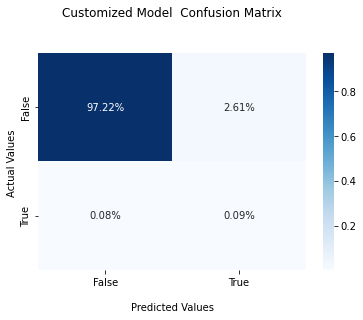

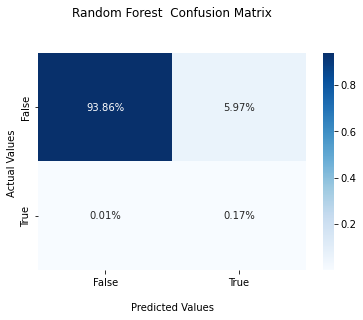

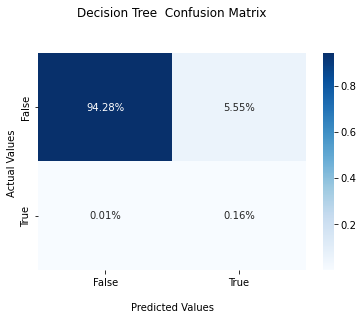

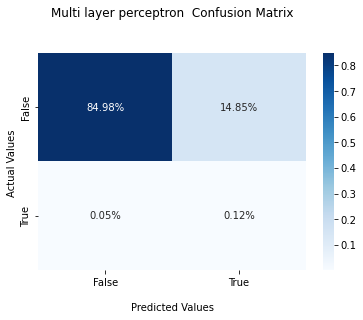

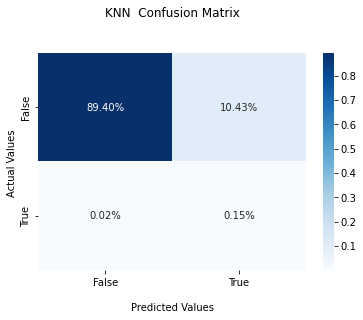

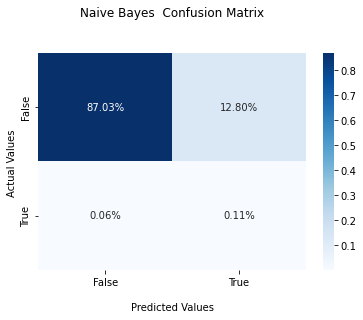

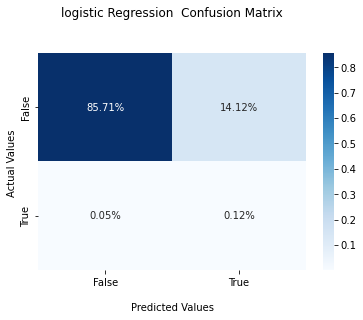

In [279]:
get_confusion_matrix()


In [280]:
get_classication_report()

    
Customized Model  Classification Report           
 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    160255
           1       0.03      0.54      0.06       274

    accuracy                           0.97    160529
   macro avg       0.52      0.76      0.53    160529
weighted avg       1.00      0.97      0.98    160529

    
Random Forest  Classification Report           
 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    160255
           1       0.03      0.97      0.05       274

    accuracy                           0.94    160529
   macro avg       0.51      0.95      0.51    160529
weighted avg       1.00      0.94      0.97    160529

    
Decision Tree  Classification Report           
 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    160255
           1       0.03      0.93      0.05       274

    accuracy  

In [284]:
print(models)
print(Accuracy)

['Customized Model', 'Random Forest', 'Decision Tree', 'Multi layer perceptron', 'KNN', 'Naive Bayes', 'logistic Regression']
[0.973, 0.94, 0.944, 0.851, 0.895, 0.871, 0.858]
